<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>


# 비지도 학습(Unsupervised Learning) 이란

데이터에서 패턴과 상관관계를 찾아내는 머신러닝 알고리즘

레이블(Y값)이 지정되지 않은 데이터를 처리할 수 있으며, 예측이 어려움

지도학습에서 적절한 변수를 찾아내기 위해 전처리 방법으로 비지도 학습을 이용하기도 함

대표적인 비지도 학습으로 클러스터링(clustering)과 차원 축소(dimensionality reduction)가 있음

- 클러스터링(clustering) : 잠재변수가 이산 변수 or 범주형 변수인 경우

- 차원 축소(dimensionality reduction) : 잠재변수가 연속 변수인 경우

- 참고 사이트 : <span style="color:grey"> https://jimmy-ai.tistory.com/52 </span>

이 외에 여러가지 방법들이 존재함

위에 걸어놓은 URL 사이트 들어가면 다양한 방법들이 나옴

상황과 데이터에 따라 선택

In [8]:
# 공통 라이브러리 및 파일 불러오기
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 분할에 필요
from sklearn.model_selection import train_test_split

In [9]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


## 클러스터링

- 잠재변수가 이산형 or 범주형 변수인 경우 사용
- 대표적 방법 : K-means, 계층적 군집 등
- k-means 클러스터링에 정규화는 필수적임
- K-means clustering 알고리즘은 데이터가 잘 정리되어있고, 적당히 분산되어있는 데이터 집합에 한해 잘 작동

In [10]:
# 함수 선언 #
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [11]:
# 정규화
data["Age"] = min_max_normalize(data["Age"])
data["Fare"] = min_max_normalize(data["Fare"])

# X, Y로 변수를 나누기(독립괴 종속 변수)
cdata = data[['Age', 'Fare']]
cdata

,Age,Fare
0,0.2750,0.014151
1,0.4750,0.139136
2,0.3250,0.015469
3,0.4375,0.103644
4,0.4375,0.015713
...,...,...
886,0.3375,0.025374
887,0.2375,0.058556
888,0.2625,0.045771
889,0.3250,0.058556


In [12]:
from sklearn.cluster import KMeans
import seaborn as sns

# k개수 지정
k = 2

# 그룹 수, random_state 설정
km_model = KMeans(n_clusters = k, random_state = 5)

# 정규화된 데이터에 학습
km_model.fit(cdata)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cdata['cluster'] = km_model.fit_predict(cdata)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18092\3542796290.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata['cluster'] = km_model.fit_predict(cdata)


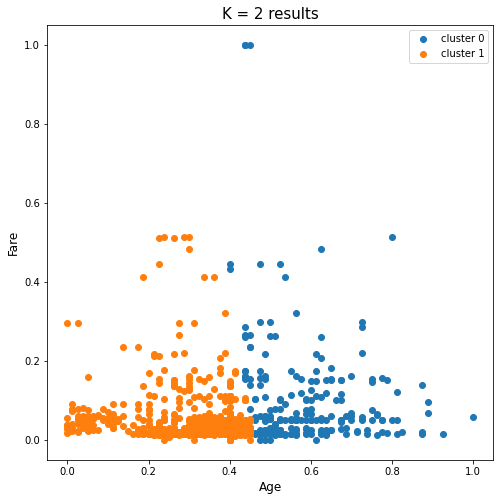

In [14]:
# 시각화

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(cdata.loc[cdata['cluster'] == i, 'Age'], cdata.loc[cdata['cluster'] == i, 'Fare'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Age', size = 12)
plt.ylabel('Fare', size = 12)
plt.show()